In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numba as nb
import pandas as pd

import charges as charges
import plotting as plotting
from itertools import combinations
import seaborn as sns

In [5]:
def euclidean_vec(combs):
    """ Compute the euclidean distance between two points
    """

    return np.sqrt((combs[:,0]- combs[:,2])**2 + (combs[:,1]- combs[:,3])**2)
    # return np.linalg.norm(p2 - p1)

def evaluate_configuration_fast(particles):
    """No idea if this is acc faster."""

    # generate combinations
    m, n = particles.shape
    comb = np.zeros((m, m, n + n), dtype=float)
    comb[:, :, :n] = particles[:, None, :]
    comb[:, :, n:] = particles
    comb.shape = (m * m, -1) # shape is 4 columns w len(particles) rows
    # now we also get p1 -p1 combinations, but
    # their inter-particle distance is 0, so we can ignore that fact
    d = euclidean_vec(comb)
    return 1/np.sum(d[d != 0])

def euclidean(p1, p2):
    """ Compute the euclidean distance between two points
    """
    return np.linalg.norm(p2 - p1)

def evaluate_configuration(particles):
    """ Calculate the total energy of the current configuration
    """
    total = 0
    for i, j in list(combinations(range(len(particles)), 2)):
        p1, p2 = particles[i], particles[j]
        total += 1 / euclidean(p1, p2)

    return total

---------------


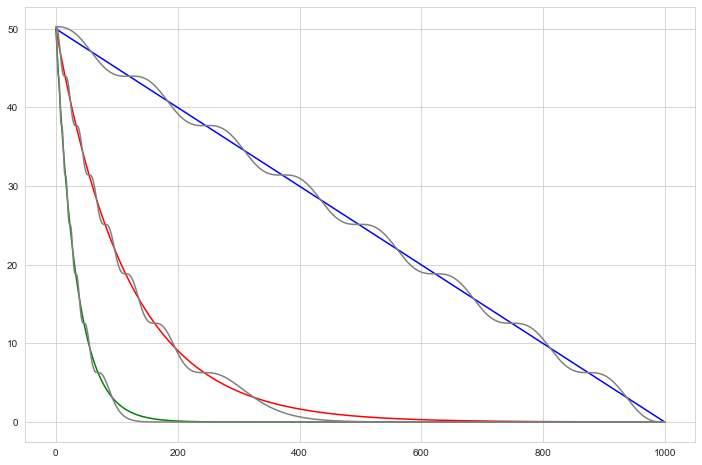

In [6]:
high_temp = 50
low_temp = 0.01
n_temps = 1000
wave_func = lambda x: x+np.exp(-0.001*-x)*np.sin(1*-x)
exponential_even = np.geomspace(high_temp, low_temp, n_temps)
exponential_0003 = np.exp(-np.arange(0, n_temps) * 30 / n_temps) * high_temp
linear = np.linspace(high_temp, low_temp, n_temps)


wavy_lin = linear+np.exp(-0.02*-linear)*np.sin(1*-linear)

plt.figure(figsize=(12,8))

plt.plot(linear,color='blue')
plt.plot(exponential_even,color='red')
plt.plot(exponential_0003,color='green')
plt.plot(wave_func(linear),color='grey')
plt.plot(wave_func(exponential_even),color='grey')
plt.plot(wave_func(exponential_0003),color='grey')
# plt.plot(wavy_exp2)
# tst_n = [high_temp * math.exp(-0.001*x) for x in range(n_temps)]

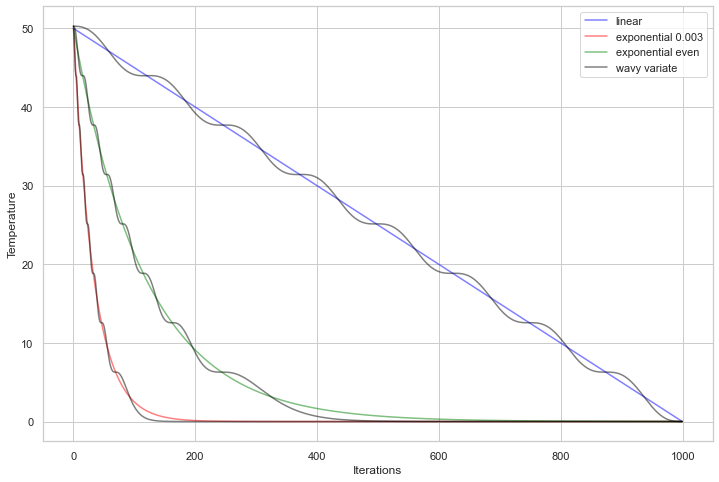

In [7]:
sns.set_theme(style="whitegrid")

# Load an example dataset with long-form data
ax = plt.figure(figsize=(12,8))
# Plot the responses for different events and regions
sns.lineplot(linear,label='linear',color='blue',alpha=0.5)
sns.lineplot(exponential_0003,label='exponential 0.003',color='red',alpha=0.5)
sns.lineplot(exponential_even,label='exponential even',color='green',alpha=0.5)
sns.lineplot(wave_func(linear),color='black',alpha=0.5, label='wavy variate')
sns.lineplot(wave_func(exponential_even),color='black',alpha=0.5)
sns.lineplot(wave_func(exponential_0003),color='black',alpha=0.5)
plt.xlabel("Iterations")
plt.ylabel("Temperature")
# sns.lineplot(x="timepoint", y="signal",
#              hue="region", style="event",
#              data=fmri)
plt.show()

In [8]:
lb_f = lambda x: np.where(x < low_temp, low_temp, x)
wave_transf = lambda x: x + np.exp(-0.001 * -x) * np.sin(1 * -x)
# wave_func = lambda x: np.where(wave_transf(x)<0.1, 0.1, wave_transf(x))
wave_func = lambda x: lb_f(wave_transf(x))

In [9]:
wave_func(exponential_0003)

array([5.02758271e+01, 4.95564326e+01, 4.70508520e+01, 4.46605565e+01,
       4.39741327e+01, 4.38826965e+01, 4.25948121e+01, 4.02100564e+01,
       3.82932433e+01, 3.76985951e+01, 3.76756881e+01, 3.69656417e+01,
       3.52157329e+01, 3.31827523e+01, 3.18282598e+01, 3.14180143e+01,
       3.14124897e+01, 3.10386750e+01, 2.99197260e+01, 2.82782656e+01,
       2.66795235e+01, 2.56054093e+01, 2.51738042e+01, 2.51340842e+01,
       2.50691554e+01, 2.46406000e+01, 2.37399870e+01, 2.24976099e+01,
       2.11823254e+01, 2.00650770e+01, 1.93122501e+01, 1.89428076e+01,
       1.88481985e+01, 1.88512761e+01, 1.87740620e+01, 1.84904244e+01,
       1.79517778e+01, 1.71856381e+01, 1.62746779e+01, 1.53269173e+01,
       1.44467543e+01, 1.37133893e+01, 1.31694689e+01, 1.28196272e+01,
       1.26365788e+01, 1.25715839e+01, 1.25662120e+01, 1.25630131e+01,
       1.25136172e+01, 1.23836643e+01, 1.21546601e+01, 1.18233029e+01,
       1.13990398e+01, 1.09006391e+01, 1.03524661e+01, 9.78098463e+00,
      

In [10]:
fname = "4_exponential_0.003_100_20"
res_df = pd.read_csv(f"logged_data/{fname}.csv",skiprows=[1]).rename(columns={"Unnamed: 0":"Iterations"})
# res_df = res_df
res_df

FileNotFoundError: [Errno 2] No such file or directory: 'logged_data/4_exponential_0.003_100_20.csv'

In [ ]:
cap_df = res_df[:3000]

In [ ]:
stats = cap_df.groupby(['Temperatures']).agg(['mean', 'sem'])
x_iters = stats["Iterations"]['mean']
stats = stats["Potential_energy"]
stats['ci95_hi'] = stats['mean'] + 1.96* stats['sem']
stats['ci95_lo'] = stats['mean'] - 1.96* stats['sem']
stats = stats.iloc[::-1]

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")

ax1 = sns.lineplot(x=x_iters,y=stats['mean'],sort=False,color='blue', label='Mean Energy in Chain')
# CI
sns.lineplot(ax=ax1, x=x_iters,y=stats['ci95_hi'],sort=False,color='grey',linestyle='--', label = '95% CI')
sns.lineplot(ax=ax1, x=x_iters,y=stats['ci95_lo'],sort=False,color='grey',linestyle='--')
ax1.fill_between(x_iters[::-1],stats['mean'],stats['ci95_hi'],color='lightblue',alpha=0.5)
ax1.fill_between(x_iters[::-1],stats['mean'],stats['ci95_lo'],color='lightblue',alpha=0.5)
ax1.scatter(x_iters[::-1],stats['mean'],color='black',s=20)

sns.set_theme(style="white")
ax2 = ax1.twinx()
sns.lineplot(ax=ax2,x=cap_df["Iterations"],y=cap_df["Temperatures"],color='red')

ax1.set_ylabel("Potential Energie, E")
ax1.set_xlabel("Iterations")
plt.xlim((1,3000))
plt.show()

In [ ]:
def plot_convergence(fname,pic_name,first_n_iters=None):
    res_df = pd.read_csv(f"logged_data/{fname}.csv", skiprows=[1]).rename(columns={"Unnamed: 0": "Iterations"})
    if first_n_iters:
        res_df = res_df[:first_n_iters]


    # calculate mean and 95% ci for temperature level
    stats = res_df.groupby(['Temperatures']).agg(['mean', 'sem'])
    x_iters = stats["Iterations"]['mean']
    stats = stats["Potential_energy"]
    stats['ci95_hi'] = stats['mean'] + 1.96 * stats['sem']
    stats['ci95_lo'] = stats['mean'] - 1.96 * stats['sem']
    stats = stats.iloc[::-1]

    # draw
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="whitegrid")

    ax1 = sns.lineplot(x=x_iters, y=stats['mean'], sort=False, color='blue', label='Mean Energy in Chain')
    sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_hi'], sort=False, color='grey', linestyle='--', label='95% CI')
    sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_lo'], sort=False, color='grey', linestyle='--')
    ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_hi'], color='lightblue', alpha=0.5)
    ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_lo'], color='lightblue', alpha=0.5)
    ax1.scatter(x_iters[::-1], stats['mean'], color='black', s=20)

    sns.set_theme(style="white")
    ax2 = ax1.twinx()
    sns.lineplot(ax=ax2, x=res_df["Iterations"], y=res_df["Temperatures"], color='red')

    ax1.set_ylabel("Potential Energie, E")
    ax1.set_xlabel("Iterations")
    plt.xlim((1, 3000))
    plt.savefig(pic_name,dpi=300,bbox_inches='tight')

In [ ]:
raise KeyboardInterrupt

In [ ]:
import matplotlib.cm as cm

def plot_ez(init_points, res):
    points = res

    theta = np.linspace(0, 2 * np.pi, 150)
    a = 1 * np.cos(theta)
    b = 1 * np.sin(theta)

    fig, ax = plt.subplots(1, figsize = (8,8))
    ax.plot(a, b, color='black')
    # plotpoints = []
    # for p in points:
    colors = list(cm.rainbow(np.linspace(0, 1, len(points))))
    for i in range(len(points)):
        ax.scatter(init_points[i,0], init_points[i,1],color=colors[i])
        ax.scatter(points[i,0], points[i,1],s=100,marker='X',color=colors[i])
    # scatter = ax.scatter(init_points[:,0], init_points[:,1], color='black',label='before')
    # scatter = ax.scatter(points[:,0], points[:,1], color='red',s=100,marker='x', label = 'black')
    plt.title("%d" % len(res))
    ax.set_aspect(1)
    # plt.legend()

In [ ]:
#test
low_temp = 0.1
high_temp = 50
n_temps = 100
schedule = "exponential_0.003"
chain_length = 20
n_charges = 4

my_charge = charges.Charges(n_charges,1,step_size=0.001)
init_points = my_charge.particles
# print(init_points)
# my_charge.evaluate_configuration()
# my_charge.evaluate_configuration_fast() # does not work, div by 0
# colors = cm.rainbow(np.linspace(0, 1, len(init_points)))


res = my_charge.iterate_SA_optimize(low_temp, high_temp, n_temps, schedule, chain_length,)

# evaluate_configuration_fast(res)

# m, n = res.shape
# comb = np.zeros((m, m, n + n), dtype=float)
# comb[:, :, :n] = res[:, None, :]
# comb[:, :, n:] = res
# comb.shape = (m * m, -1) # shape is 4 columns w len(particles) rows
# print(comb)
# # now we also get p1 -p1 combinations, but
# # their inter-particle distance is 0, so we can ignore that fact
#
# 1/np.sum(euclidean_vec(comb))



In [ ]:
plot_ez(res,res)

In [ ]:
print(evaluate_configuration_fast(init_points))
print(evaluate_configuration_fast(res))

In [ ]:
my_data = np.loadtxt('logged_data/20_exponential_0.003_200000.csv', delimiter=',',skiprows=1)

In [ ]:
my_data

In [ ]:
plt.plot(my_data)

------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numba as nb
import pandas as pd

import charges as charges
import plotting as plotting
from itertools import combinations
import seaborn as sns
import charges as charges

In [ ]:
def euclidean_vec(combs):
    """ Compute the euclidean distance between two points
    """

    return np.sqrt((combs[:,0]- combs[:,2])**2 + (combs[:,1]- combs[:,3])**2)
    # return np.linalg.norm(p2 - p1)

def evaluate_configuration_fast(particles):
    """No idea if this is acc faster."""

    # generate combinations
    m, n = particles.shape
    comb = np.zeros((m, m, n + n), dtype=float)
    comb[:, :, :n] = particles[:, None, :]
    comb[:, :, n:] = particles
    comb.shape = (m * m, -1) # shape is 4 columns w len(particles) rows
    # now we also get p1 -p1 combinations, but
    # their inter-particle distance is 0, so we can ignore that fact
    d = euclidean_vec(comb)
    return 1/np.sum(d[d != 0])

def euclidean(p1, p2):
    """ Compute the euclidean distance between two points
    """
    return np.linalg.norm(p2 - p1)

def evaluate_configuration(particles):
    """ Calculate the total energy of the current configuration
    """
    total = 0
    for i, j in list(combinations(range(len(particles)), 2)):
        p1, p2 = particles[i], particles[j]
        total += 1 / euclidean(p1, p2)

    return total

---------------


In [ ]:
high_temp = 50;
low_temp = 0.01;
n_temps = 1000
wave_func = lambda x: x+np.exp(-0.001*-x)*np.sin(1*-x)
exponential_even = np.geomspace(high_temp, low_temp, n_temps)
exponential_0003 = np.exp(-np.arange(0, n_temps) * 30 / n_temps) * high_temp
linear = np.linspace(high_temp, low_temp, n_temps)


wavy_lin = linear+np.exp(-0.02*-linear)*np.sin(1*-linear)

plt.figure(figsize=(12,8))

plt.plot(linear,color='blue')
plt.plot(exponential_even,color='red')
plt.plot(exponential_0003,color='green')
plt.plot(wave_func(linear),color='grey')
plt.plot(wave_func(exponential_even),color='grey')
plt.plot(wave_func(exponential_0003),color='grey')
# plt.plot(wavy_exp2)
# tst_n = [high_temp * math.exp(-0.001*x) for x in range(n_temps)]

In [ ]:
sns.set_theme(style="whitegrid")

# Load an example dataset with long-form data
ax = plt.figure(figsize=(12,8))
# Plot the responses for different events and regions
sns.lineplot(linear,label='linear',color='blue',alpha=0.5)
sns.lineplot(exponential_0003,label='exponential 0.003',color='red',alpha=0.5)
sns.lineplot(exponential_even,label='exponential even',color='green',alpha=0.5)
sns.lineplot(wave_func(linear),color='black',alpha=0.5, label='wavy variate')
sns.lineplot(wave_func(exponential_even),color='black',alpha=0.5)
sns.lineplot(wave_func(exponential_0003),color='black',alpha=0.5)
plt.xlabel("Iterations")
plt.ylabel("Temperature")
# sns.lineplot(x="timepoint", y="signal",
#              hue="region", style="event",
#              data=fmri)
plt.show()

In [ ]:
fname = "20_exponential_0.003_100_50_noforce_nowavy"
res_df = pd.read_csv(f"logged_data/{fname}.csv",skiprows=[1]).rename(columns={"Unnamed: 0":"Iterations"})
# res_df = res_df
res_df

In [ ]:
cap_df = res_df

In [ ]:
stats = cap_df.groupby(['Temperatures']).agg(['mean', 'count', 'std'])
stats = stats["Potential_energy"]
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

In [ ]:
stats = cap_df.groupby(['Temperatures']).agg(['mean', 'sem'])
x_iters = stats["Iterations"]['mean']
stats = stats["Potential_energy"]
stats['ci95_hi'] = stats['mean'] + 1.96* stats['sem']
stats['ci95_lo'] = stats['mean'] - 1.96* stats['sem']
print(stats)
stats = stats.iloc[::-1]

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")

ax1 = sns.lineplot(x=x_iters,y=stats['mean'],sort=False,color='blue', label='Mean Energy in Chain')
ax1.plot(res_df['Iterations'],res_df['Potential_energy'], color='black',alpha=0.2)
sns.lineplot(ax=ax1, x=x_iters,y=stats['ci95_hi'],sort=False,color='grey',linestyle='--', label = '95% CI')
sns.lineplot(ax=ax1, x=x_iters,y=stats['ci95_lo'],sort=False,color='grey',linestyle='--')
ax1.fill_between(x_iters[::-1],stats['mean'],stats['ci95_hi'],color='lightblue',alpha=0.5)
ax1.fill_between(x_iters[::-1],stats['mean'],stats['ci95_lo'],color='lightblue',alpha=0.5)
# ax1.scatter(x_iters[::-1],stats['mean'],color='black',s=20)

sns.set_theme(style="white")
ax2 = ax1.twinx()
sns.lineplot(ax=ax2,x=cap_df["Iterations"],y=cap_df["Temperatures"],color='red')

ax1.set_ylabel("Potential Energie, E")
ax1.set_xlabel("Iterations")
plt.xlim((10000,15000))
plt.show()

In [ ]:
def plot_convergence(fname,pic_name,first_n_iters=None):
    res_df = pd.read_csv(f"logged_data/{fname}.csv", skiprows=[1]).rename(columns={"Unnamed: 0": "Iterations"})
    if first_n_iters:
        res_df = res_df[:first_n_iters]


    # calculate mean and 95% ci for temperature level
    stats = res_df.groupby(['Temperatures']).agg(['mean', 'sem'])
    x_iters = stats["Iterations"]['mean']
    stats = stats["Potential_energy"]
    stats['ci95_hi'] = stats['mean'] + 1.96 * stats['sem']
    stats['ci95_lo'] = stats['mean'] - 1.96 * stats['sem']
    stats = stats.iloc[::-1]

    # draw
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="whitegrid")

    ax1 = sns.lineplot(x=x_iters, y=stats['mean'], sort=False, color='blue', label='Mean Energy in Chain')
    sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_hi'], sort=False, color='grey', linestyle='--', label='95% CI')
    sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_lo'], sort=False, color='grey', linestyle='--')
    ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_hi'], color='lightblue', alpha=0.5)
    ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_lo'], color='lightblue', alpha=0.5)
    ax1.scatter(x_iters[::-1], stats['mean'], color='black', s=20)

    sns.set_theme(style="white")
    ax2 = ax1.twinx()
    sns.lineplot(ax=ax2, x=res_df["Iterations"], y=res_df["Temperatures"], color='red')

    ax1.set_ylabel("Potential Energie, E")
    ax1.set_xlabel("Iterations")
    plt.xlim((1, 3000))
    plt.savefig(pic_name,dpi=300,bbox_inches='tight')

In [ ]:
raise KeyboardInterrupt

In [ ]:
import matplotlib.cm as cm

def plot_ez(init_points, res):
    points = res

    theta = np.linspace(0, 2 * np.pi, 150)
    a = 1 * np.cos(theta)
    b = 1 * np.sin(theta)

    fig, ax = plt.subplots(1, figsize = (8,8))
    ax.plot(a, b, color='black')
    # plotpoints = []
    # for p in points:
    colors = list(cm.rainbow(np.linspace(0, 1, len(points))))
    for i in range(len(points)):
        ax.scatter(init_points[i,0], init_points[i,1],color=colors[i])
        ax.scatter(points[i,0], points[i,1],s=100,marker='X',color=colors[i])
    # scatter = ax.scatter(init_points[:,0], init_points[:,1], color='black',label='before')
    # scatter = ax.scatter(points[:,0], points[:,1], color='red',s=100,marker='x', label = 'black')
    plt.title("%d" % len(res))
    ax.set_aspect(1)
    # plt.legend()

In [ ]:
#test
low_temp = 0.1
high_temp = 50
n_temps = 100
schedule = "exponential_0.003"
chain_length = 50
n_charges = 20
my_charge = charges.Charges(n_charges,1,step_size=0.001)
init_points = my_charge.particles
# print(init_points)
# my_charge.evaluate_configuration()
# my_charge.evaluate_configuration_fast() # does not work, div by 0
# colors = cm.rainbow(np.linspace(0, 1, len(init_points)))


# res = my_charge.iterate_SA_optimize(low_temp, high_temp, n_temps, schedule, chain_length)





In [ ]:
plot_ez(res,res)

In [ ]:
import plotting

In [ ]:
plotting.plot_convergence("20_exponential_0.003_100_50_noforce_nowavy",'test',10000,False)

In [ ]:
print(evaluate_configuration_fast(init_points))
print(evaluate_configuration_fast(res))

In [ ]:
wave_func = lambda x: x + np.exp(-0.001 * -x) * np.sin(1 * -x)


In [ ]:
my_data = np.loadtxt('logged_data/20_exponential_0.003_200000.csv', delimiter=',',skiprows=1)

In [ ]:
my_data

In [ ]:
plt.plot(my_data)

In [ ]:
np.concatenate((np.zeros(n_temps),np.ones(n_temps))).T

In [ ]:
fname1 = "final_particles_12_exponential_0.003_100_10_noforce_wavy"
fname2 = "final_particles_12_exponential_even_spacing_100_10_noforce_wavy"
fname3 = "final_particles_12_linear_100_10_noforce_wavy"

In [ ]:
def plot_convergence(fname1,fname2,fname3,pic_name='no_force', first_n_iters=None, plot_points = True, plot_raw_data=False):
    """
    Plot convergence, temperature and final configuration in single plot and save as svg.
    @param fname: file name for the energies
    @param pic_name: the name of the output image, if black will use "final_particles_" + fname + '.csv'
    @param first_n_iters: only show the first n evaluations
    @param plot_points: if plot the mean energy as additional scatterpoints over the curve
    @param plot_raw_data: if plot the raw data under the plot
    """
    # draw
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="whitegrid")
    sns.set_context("notebook", font_scale=1.5)

    for fname in [fname1,fname2,fname3]:

        # get data
        particles_fname = "final_particles_" + fname + '.csv'
        final_config = np.loadtxt('logged_data/' + particles_fname, delimiter=',')
        res_df = pd.read_csv(f"logged_data/{fname}.csv", skiprows=[1]).rename(columns={"Unnamed: 0": "Iterations"})

        # calculate mean and 95% ci for temperature level
        stats = res_df.groupby(['Temperatures']).agg(['mean', 'sem'])
        x_iters = stats["Iterations"]['mean']
        stats = stats["Potential_energy"]
        stats['ci95_hi'] = stats['mean'] + 1.96 * stats['sem']
        stats['ci95_lo'] = stats['mean'] - 1.96 * stats['sem']
        stats = stats.iloc[::-1]

        # draw main convergence data, CI and means
        ax1 = sns.lineplot(x=x_iters, y=stats['mean'], sort=False, color='blue', label='Mean Energy')
        sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_hi'], sort=False, color='cornflowerblue', linestyle='--', label='95% CI')
        sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_lo'], sort=False, color='cornflowerblue', linestyle='--')
        ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_hi'], color='cornflowerblue', alpha=0.5)
        ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_lo'], color='cornflowerblue', alpha=0.5)
        if plot_points:
            ax1.scatter(x_iters[::-1], stats['mean'], color='black', s=20)




    lines, labels = ax1.get_legend_handles_labels()
    leg = ax1.legend(lines, labels, loc='upper center', framealpha=1, prop={'size': 14})
    leg.get_frame().set_edgecolor('black')

    # color the axis
    ax1.spines['left'].set_color('blue')
    ax1.spines['left'].set_linewidth(2)


    ax1.set_ylabel(r"Potential Energy, $E$")
    ax1.set_xlabel("Evaluations")
    if first_n_iters:
        plt.xlim((1, first_n_iters))

    plt.savefig('Images/'+pic_name+".svg",dpi=300,bbox_inches='tight')

In [ ]:
plot_convergence(fname1,fname2,fname3)

-------

In [11]:
fname1 = "12_linear_100_10_noforce_wavy"
fname2 = "12_exponential_even_spacing_100_10_noforce_wavy"
fname3 = "12_exponential_0.003_100_10_noforce_wavy"

def plot_convergence(fname1, fname2, fname3,names=['no force','full force', "late force"], pic_name='no_force', first_n_iters=None, plot_points=True,
                     plot_raw_data=False):
    """
    Plot convergence, temperature and final configuration in single plot and save as svg.
    @param fname: file name for the energies
    @param pic_name: the name of the output image, if black will use "final_particles_" + fname + '.csv'
    @param first_n_iters: only show the first n evaluations
    @param plot_points: if plot the mean energy as additional scatterpoints over the curve
    @param plot_raw_data: if plot the raw data under the plot
    """
    # draw
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="whitegrid")
    sns.set_context("notebook", font_scale=1.5)

    colors = ['red','blue','green']
    region_colors = ['indianred','cornflowerblue','mediumseagreen']

    for idx, fname in enumerate([fname1, fname2, fname3]):

        # get data
        particles_fname = "final_particles_" + fname + '.csv'
        final_config = np.loadtxt('logged_data/' + particles_fname, delimiter=',')
        res_df = pd.read_csv(f"logged_data/{fname}.csv", skiprows=[1]).rename(columns={"Unnamed: 0": "Iterations"})

        # calculate mean and 95% ci for temperature level
        stats = res_df.groupby(['Temperatures']).agg(['mean', 'sem'])
        x_iters = stats["Iterations"]['mean']
        stats = stats["Potential_energy"]
        stats['ci95_hi'] = stats['mean'] + 1.96 * stats['sem']
        stats['ci95_lo'] = stats['mean'] - 1.96 * stats['sem']
        stats = stats.iloc[::-1]

        # draw main convergence data, CI and means
        ax1 = sns.lineplot(x=x_iters, y=stats['mean'], sort=False, color=colors[idx], label=names[idx])
        sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_hi'], sort=False, color=region_colors[idx], linestyle='--')
        sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_lo'], sort=False, color=region_colors[idx], linestyle='--')
        ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_hi'], color=region_colors[idx], alpha=0.5)
        ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_lo'], color=region_colors[idx], alpha=0.5)
        if plot_points:
            ax1.scatter(x_iters[::-1], stats['mean'], color='black', s=20)

    lines, labels = ax1.get_legend_handles_labels()
    leg = ax1.legend(lines, labels, loc='upper right', framealpha=1, prop={'size': 14})
    leg.get_frame().set_edgecolor('black')

    # color the axis

    ax1.set_ylabel(r"Potential Energy, $E$")
    ax1.set_xlabel("Evaluations")
    if first_n_iters:
        plt.xlim((1, first_n_iters))

    plt.savefig('Images/' + pic_name + ".svg", dpi=300, bbox_inches='tight')


plot_convergence(fname1, fname2, fname3)

OSError: logged_data/final_particles_12_linear_100_10_noforce_wavy.csv not found.

<Figure size 864x576 with 0 Axes>